<a href="https://colab.research.google.com/github/ankit-genzeon/AI-ML-Bootcamp-Genzeon-2023/blob/master/Case_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
dataset ='/content/drive/MyDrive/Colab Notebooks/50_Startups.xlsx'
df = pd.read_excel(dataset)
df


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
from sklearn.linear_model import LinearRegression
# Convert categorical variables into dummy/indicator variables
df = pd.get_dummies(df, columns=['State'], drop_first=True)

# Separate independent variables (features) and dependent variable (target)
X = df.drop('Profit', axis=1)
y = df['Profit']

# Create and fit the regression model
regression = LinearRegression()
regression.fit(X, y)

# Print the coefficients (slopes) of the independent variables
coefficients = dict(zip(X.columns, regression.coef_))
print(coefficients)

{'R&D Spend': 0.806023113717876, 'Administration': -0.027004319575110167, 'Marketing Spend': 0.026979861034547248, 'State_Florida': 198.78879286278882, 'State_New York': -41.88701913356085}


In [ ]:
'''
The coefficient for 'R&D Spend' is 0.806023113717876. It indicates that, on
average, a $1 increase in R&D spending is associated with an increase in profit by approximately $0.81, assuming all other factors remain constant.

The coefficient for 'Administration' is -0.027004319575110167. It suggests that, on average, a $1 increase in administration costs is associated with a decrease in profit by approximately $0.03,
 assuming all other factors remain constant.

The coefficient for 'Marketing Spend' is 0.026979861034547248. It suggests that, on average, a $1 increase in marketing spending is associated with an increase in profit by approximately $0.03,
assuming all other factors remain constant.

The coefficient for 'State_Florida' is 198.78879286278882. It means that, on average, being in the state of Florida (compared to the base state) is associated with an increase in profit by approximately $198.79,
assuming all other factors remain constant.

The coefficient for 'State_New York' is -41.88701913356085. It means that, on average, being in the state of New York (compared to the base state) is associated with a decrease in profit by approximately $41.89,
 assuming all other factors remain constant.
'''

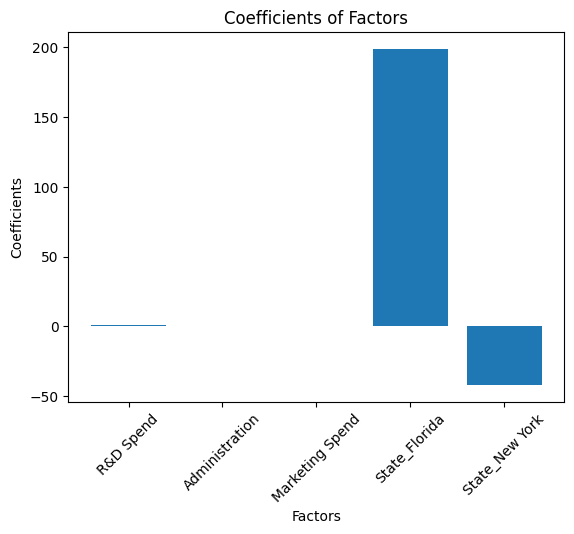

In [9]:
import matplotlib.pyplot as plt

# Create lists for factor names and coefficient values
factors = list(coefficients.keys())
values = list(coefficients.values())

# Create the bar plot
plt.bar(factors, values)
plt.xlabel('Factors')
plt.ylabel('Coefficients')
plt.title('Coefficients of Factors')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the plot
plt.show()


In [11]:
import pandas as pd
import statsmodels.api as sm

# Encode categorical variable 'State' as dummy variables
data_encoded = pd.get_dummies(df, drop_first=True)

# Separate the independent variables and the dependent variable
X = data_encoded.drop('Profit', axis=1)
y = data_encoded['Profit']

# Add a constant column to the independent variables matrix
X_with_const = sm.add_constant(X)

# Create and fit the regression model
model = sm.OLS(y, X_with_const)
results = model.fit()

# Print the summary of the regression model
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Thu, 15 Jun 2023   Prob (F-statistic):           1.34e-27
Time:                        06:26:10   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            5.013e+04   6884.820     

In [13]:
#Extracting Independent and dependent Variable
x= df.iloc[:, :-1].values
y= df.iloc[:, 4].values

In [14]:
# Splitting the dataset into training and test set.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=0)

In [15]:
#Fitting the MLR model to the training set:
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [16]:
#Predicting the Test set result;
y_pred= regressor.predict(x_test)

In [17]:
print('Train Score: ', regressor.score(x_train, y_train))
print('Test Score: ', regressor.score(x_test, y_test))

Train Score:  1.0
Test Score:  1.0


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset into a pandas DataFrame
data = pd.DataFrame({
    'R&D Spend': [165349.2, 162597.7, 153441.51, ...],
    'Administration': [136897.8, 151377.59, 101145.55, ...],
    'Marketing Spend': [471784.1, 443898.53, 407934.54, ...],
    'State': ['New York', 'California', 'Florida', ...],
    'Profit': [192261.83, 191792.06, 191050.39, ...]
})

# Encode categorical variable 'State' as dummy variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Calculate the correlation matrix
corr_matrix = data_encoded.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()


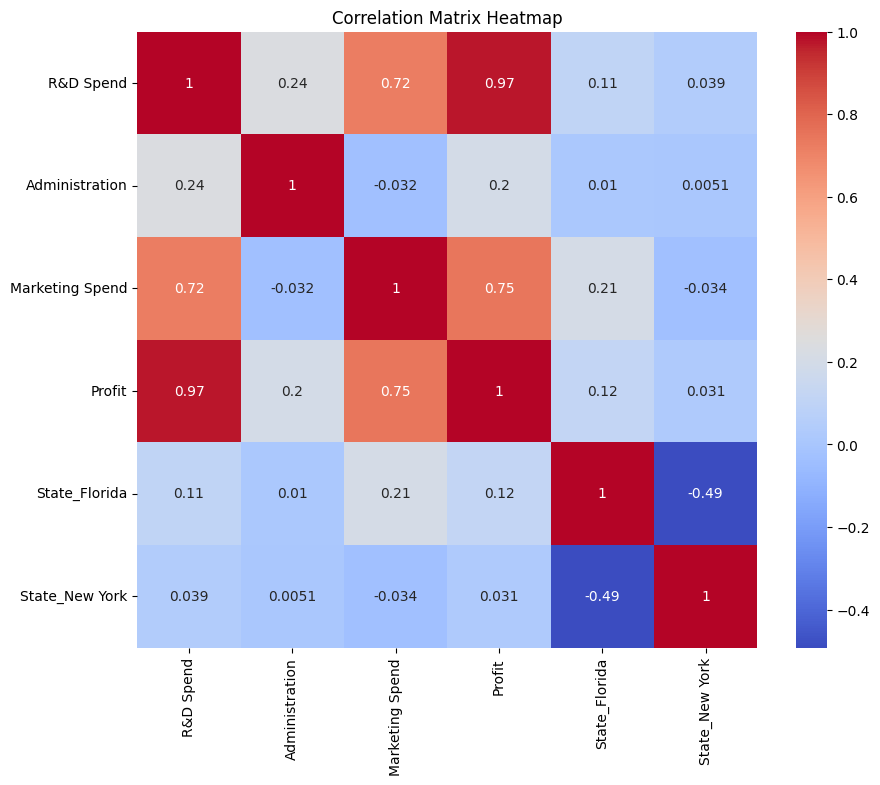

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Encode categorical variable 'State' as dummy variables
data_encoded = pd.get_dummies(df, drop_first=True)

# Calculate the correlation matrix
corr_matrix = data_encoded.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()